In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))
from ficaria.missing_imputation import KIImputer, FCMKIterativeImputer

In [2]:
np.random.seed(42)

n_rows = 50
data = {
    'A': np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_rows, p=[0.05, 0.2, 0.2, 0.2, 0.25, 0.10]),
    'B': np.random.choice([5, 4, 3, 2, 1, np.nan], size=n_rows, p=[0.1, 0.15, 0.3, 0.1, 0.15, 0.2]),
    'C': np.random.choice([9, 8, 7, 6, 5, np.nan], size=n_rows, p=[0.2, 0.2, 0.2, 0.15, 0.1, 0.15])
}

X_test = pd.DataFrame(data)

In [3]:
# Imputation with KIImputer
ki_imputer = KIImputer()
ki_imputer.fit(X_test)
X_imputed_ki = ki_imputer.transform(X_test)

In [4]:
# Imputation with FCMKIterativeImputer
fcki_imputer = FCMKIterativeImputer(random_state=42, max_clusters=4)
fcki_imputer.fit(X_test)
X_imputed_fcki = fcki_imputer.transform(X_test)

In [5]:
print("Original data with missing values:")
print(X_test.head(10))
print("\nData after imputation with KIImputer:")
print(pd.DataFrame(X_imputed_ki, columns=X_test.columns).head(10))
print("\nData after imputation with FCKIImputer:")
print(pd.DataFrame(X_imputed_fcki, columns=X_test.columns).head(10))

Original data with missing values:
     A    B    C
0  3.0  NaN  9.0
1  NaN  1.0  6.0
2  5.0  NaN  8.0
3  4.0  NaN  7.0
4  2.0  2.0  NaN
5  2.0  NaN  8.0
6  2.0  5.0  7.0
7  5.0  4.0  5.0
8  4.0  5.0  8.0
9  5.0  3.0  9.0

Data after imputation with KIImputer:
     A         B    C
0  3.0  3.500000  9.0
1  5.0  1.000000  6.0
2  5.0  2.408586  8.0
3  4.0  2.995127  7.0
4  2.0  2.000000  8.0
5  2.0  3.285714  8.0
6  2.0  5.000000  7.0
7  5.0  4.000000  5.0
8  4.0  5.000000  8.0
9  5.0  3.000000  9.0

Data after imputation with FCKIImputer:
          A         B    C
0  3.000000  3.000000  9.0
1  2.750192  1.000000  6.0
2  5.000000  2.999174  8.0
3  4.000000  4.000000  7.0
4  2.000000  2.000000  8.0
5  2.000000  2.000000  8.0
6  2.000000  5.000000  7.0
7  5.000000  4.000000  5.0
8  4.000000  5.000000  8.0
9  5.000000  3.000000  9.0


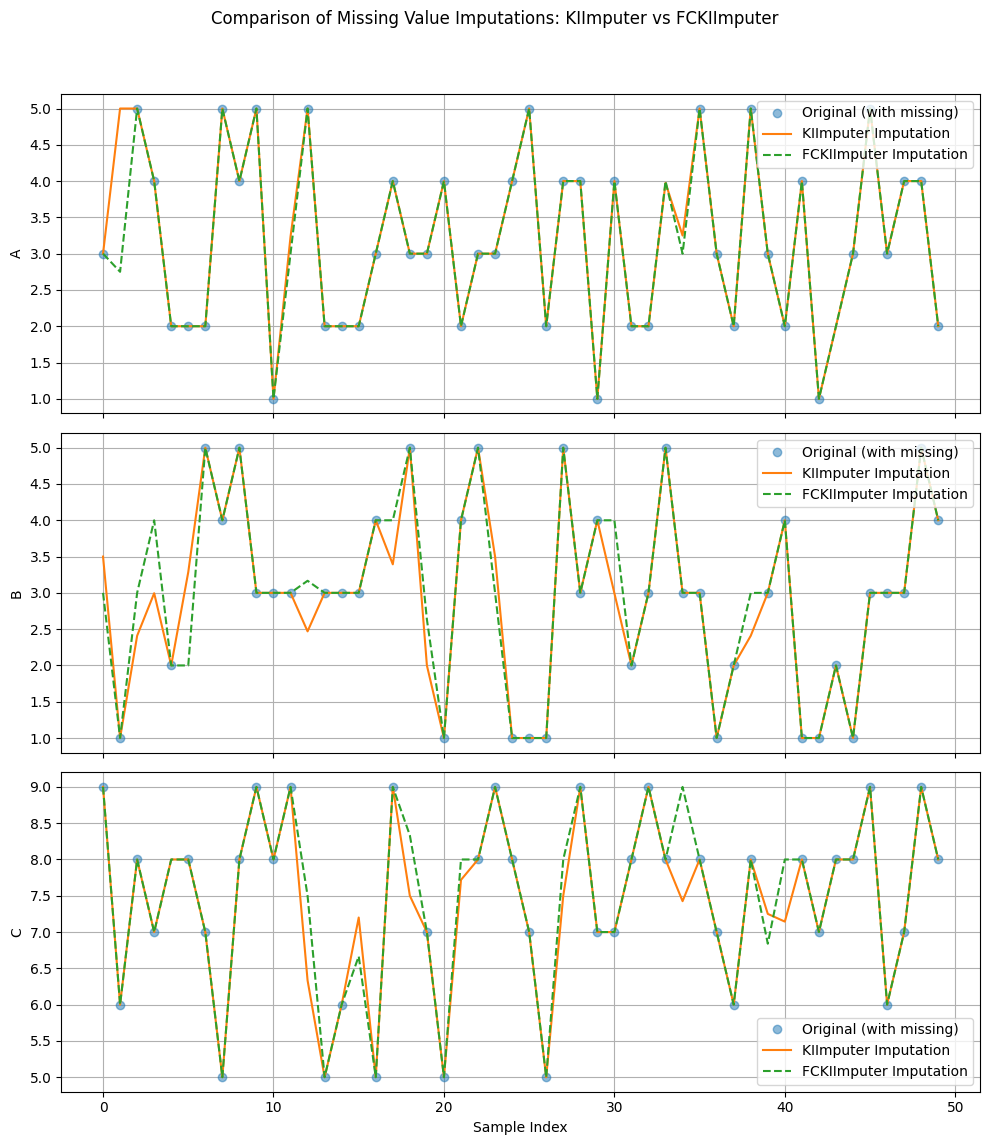

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

cols = X_test.columns
x = np.arange(n_rows)

for i, col in enumerate(cols):
    axes[i].plot(x, X_test[col], 'o', label='Original (with missing)', alpha=0.5)
    axes[i].plot(x, X_imputed_ki[:, i], '-', label='KIImputer Imputation')
    axes[i].plot(x, X_imputed_fcki.iloc[:, i], '--', label='FCKIImputer Imputation')
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")

plt.suptitle("Comparison of Missing Value Imputations: KIImputer vs FCKIImputer")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [13]:
# Sample data
data = pd.DataFrame({
    'age': [25, 26, np.nan, 51, 53, 72, 75],
    'income': [50000, 55000, 80000, 85000, 90000, 120000, 125000]
})

fcki_imputer = FCMKIterativeImputer(max_clusters=5, random_state=42)
fcki_imputer.fit(data)
X_imputed_fcki = fcki_imputer.transform(data)

print(X_imputed_fcki)

         age    income
0  25.000000   50000.0
1  26.000000   55000.0
2  46.892468   80000.0
3  51.000000   85000.0
4  53.000000   90000.0
5  72.000000  120000.0
6  75.000000  125000.0


In [14]:
data = pd.DataFrame({
    'height_cm': [165, 170, np.nan, 180, 175, 160, np.nan, 190],
    'weight_kg': [60, 65, 70, np.nan, 80, 55, 68, 85],
    'bmi': [22.0, 22.5, 24.2, 26.5, np.nan, 21.5, 23.8, np.nan]
})

fcki_imputer = FCMKIterativeImputer(max_clusters=4, random_state=42)
fcki_imputer.fit(data)
X_imputed_fcki = fcki_imputer.transform(data)

print(X_imputed_fcki)

   height_cm  weight_kg        bmi
0      165.0  60.000000  22.000000
1      170.0  65.000000  22.500000
2      180.0  70.000000  24.200000
3      180.0  72.666529  26.500000
4      175.0  80.000000  26.500000
5      160.0  55.000000  21.500000
6      180.0  68.000000  23.800000
7      190.0  85.000000  38.419803
